In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path


from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

c:\users\chanc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Extracting Data

In [19]:
df=pd.read_csv('data.csv')

In [20]:
df

,Week,Sex,Age,Population,Vaccinated,Vaccinated Percent,Vaccinated Lag14,Vaccinated Lag14 Percent,SARSCoV-\nIncidence,SARSCoV-\n2\nIncidence\nall,SARSCoV-\n2\nIncidence\nshare,COVID-\n19\nFatality,COVID-\n19\nFatality\nall,COVID-\n19\nFatality\nshare
0,1,f,15-34,445412,1,0.00,0,0.00,765,2946,0.26,0,151,0.00
1,1,f,35-59,709015,2,0.00,0,0.00,1022,2946,0.35,3,151,0.02
2,1,f,60-79,475567,0,0.00,0,0.00,424,2946,0.14,30,151,0.20
3,1,f,80+,173095,1,0.00,0,0.00,579,2946,0.20,118,151,0.78
4,1,m,15-34,482066,0,0.00,0,0.00,728,2373,0.31,0,134,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,20,f,80+,173095,130003,75.11,127425,73.62,15,924,0.02,1,5,0.20
156,20,m,15-34,482066,20859,4.33,14185,2.94,313,961,0.33,0,6,0.00
157,20,m,35-59,709197,48893,6.89,32358,4.56,349,961,0.36,2,6,0.33
158,20,m,60-79,438976,60940,13.88,35993,8.20,94,961,0.10,4,6,0.67


In [21]:
df.columns

Index(['Week', 'Sex', 'Age', 'Population', 'Vaccinated', ' Vaccinated Percent',
       'Vaccinated Lag14', 'Vaccinated Lag14 Percent', 'SARSCoV-\nIncidence',
       'SARSCoV-\n2\nIncidence\nall', 'SARSCoV-\n2\nIncidence\nshare',
       'COVID-\n19\nFatality', 'COVID-\n19\nFatality\nall',
       'COVID-\n19\nFatality\nshare'],
      dtype='object')

In [22]:
df.drop([' Vaccinated Percent','Vaccinated Lag14','Vaccinated Lag14 Percent','SARSCoV-\nIncidence','SARSCoV-\n2\nIncidence\nall', 'SARSCoV-\n2\nIncidence\nshare','COVID-\n19\nFatality\nall','COVID-\n19\nFatality\nshare'], axis = 1, inplace = True)



In [23]:
df

,Week,Sex,Age,Population,Vaccinated,COVID-\n19\nFatality
0,1,f,15-34,445412,1,0
1,1,f,35-59,709015,2,3
2,1,f,60-79,475567,0,30
3,1,f,80+,173095,1,118
4,1,m,15-34,482066,0,0
...,...,...,...,...,...,...
155,20,f,80+,173095,130003,1
156,20,m,15-34,482066,20859,0
157,20,m,35-59,709197,48893,2
158,20,m,60-79,438976,60940,4


# Data Visualization

Text(0.5, 1.0, 'Vaccinated Individual across time')

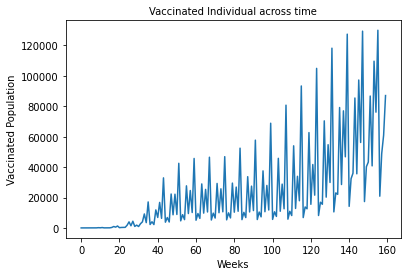

In [14]:
df['Vaccinated'].plot()
plt.xlabel('Weeks') 
plt.ylabel('Vaccinated Population') 
plt.title(label="Vaccinated Individual across time",
          fontsize=10,
          color="Black")

Text(0.5, 1.0, 'Covid_Fatality across Time')

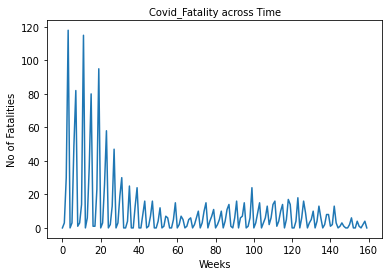

In [15]:
df['COVID-\n19\nFatality'].plot()
plt.xlabel('Weeks') 
plt.ylabel('No of Fatalities') 
plt.title(label="Covid_Fatality across Time",
          fontsize=10,
          color="Black")

In [15]:
correlation=df.corr()

<AxesSubplot:>

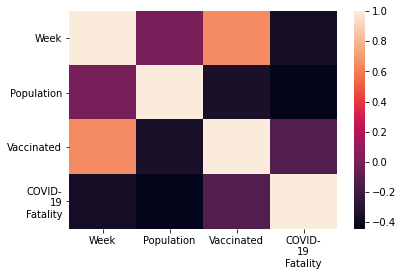

In [16]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

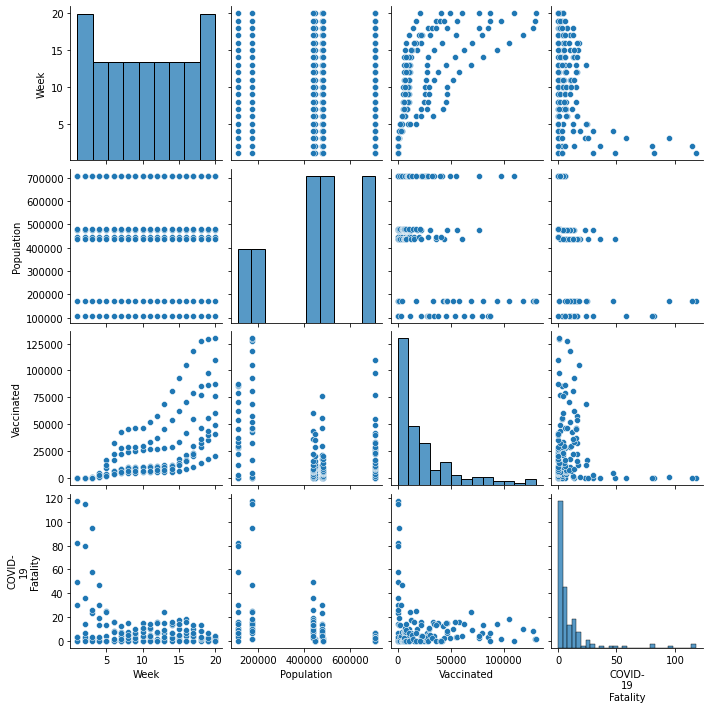

In [17]:
sns.pairplot(df)

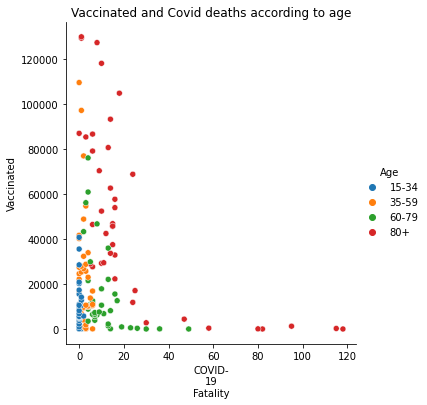

In [17]:
sns.relplot(x='COVID-\n19\nFatality',y='Vaccinated',hue='Age',data=df).set(title='Vaccinated and Covid deaths according to age')

c:\users\chanc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vaccinated', ylabel='Density'>

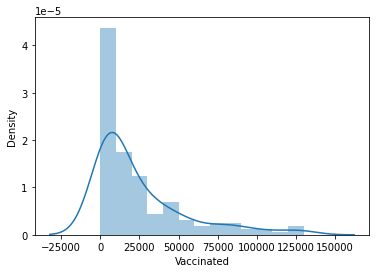

In [19]:
sns.distplot(df['Vaccinated'])

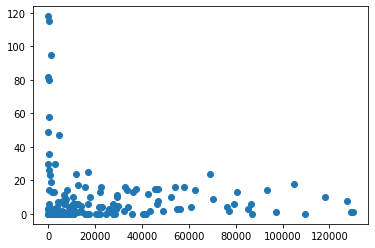

In [20]:
plt.scatter(df['Vaccinated'],df['COVID-\n19\nFatality'])

In [1]:
sns.displot(df, x="Vaccinated", hue="Sex", kind="kde", multiple="stack")

c:\users\chanc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<IPython.core.display.Javascript object>

NameError: name 'df' is not defined

In [ ]:
sns.displot(df, x="COVID-\n19\nFatality", hue="Sex", kind="kde", multiple="stack")

In [ ]:
sns.distplot(df.Vaccinated,label='Vaccinated')
sns.distplot(df.COVID-\n19\nFatality,label='fatality')

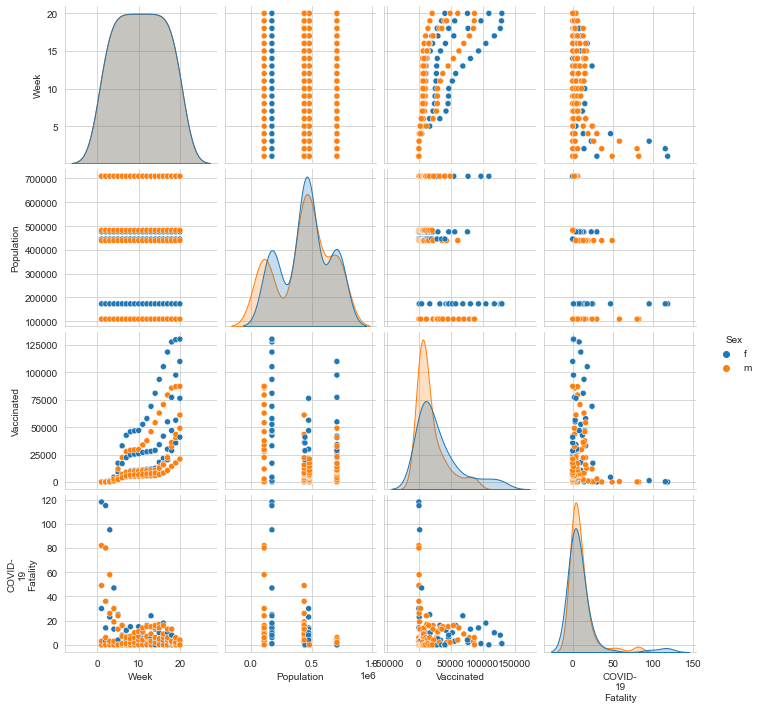

In [23]:
sns.pairplot(df, hue="Sex", height=2.5)

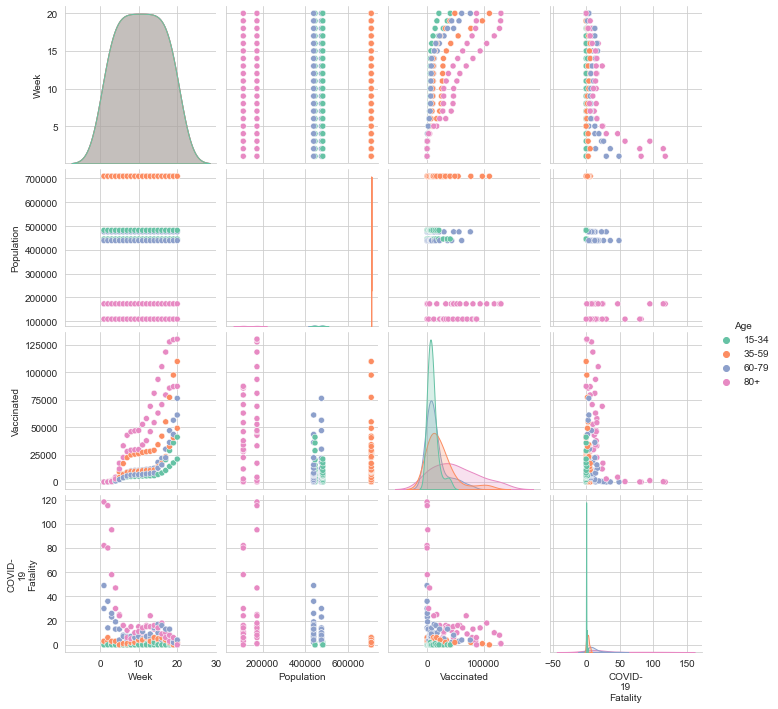

In [24]:
sns.pairplot(df, hue="Age", palette="Set2", diag_kind="kde", height=2.5)

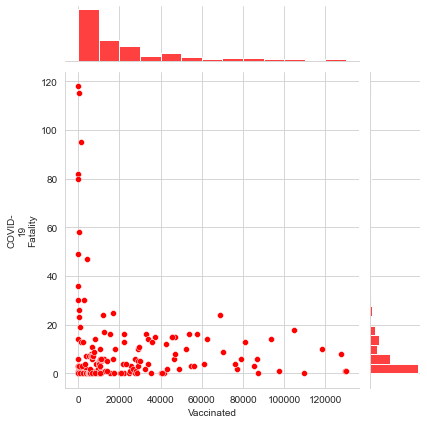

In [25]:
sns.jointplot(x=df["Vaccinated"], y=df["COVID-\n19\nFatality"],color='red', kind='scatter')

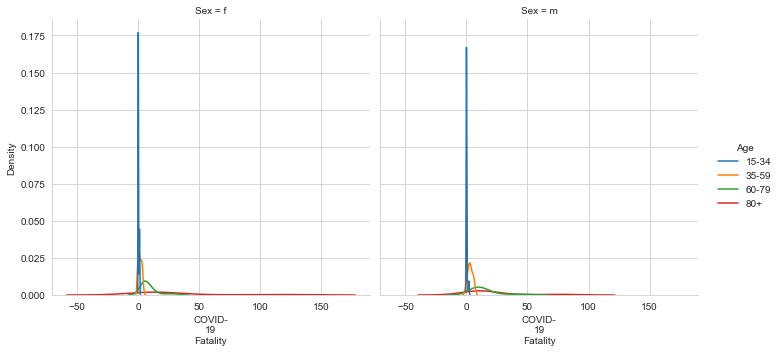

In [26]:
sns.displot(data=df, x="COVID-\n19\nFatality", hue="Age", col="Sex", kind="kde")


# Creating Prediction Model

# Linear Regression

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [124]:
df[['Population','Vaccinated','COVID-\n19\nFatality']] = scaler.fit_transform(df[['Population','Vaccinated','COVID-\n19\nFatality']])
df

,Week,Sex,Age,Population,Vaccinated,COVID-\n19\nFatality
0,1,f,15-34,0.560549,0.000008,0.000000
1,1,f,35-59,0.999697,0.000015,0.025424
2,1,f,60-79,0.610785,0.000000,0.254237
3,1,f,80+,0.106884,0.000008,1.000000
4,1,m,15-34,0.621612,0.000000,0.000000
...,...,...,...,...,...,...
155,20,f,80+,0.106884,1.000000,0.008475
156,20,m,15-34,0.621612,0.160450,0.000000
157,20,m,35-59,1.000000,0.376091,0.016949
158,20,m,60-79,0.549827,0.468758,0.033898


In [146]:
df_lin=df[['Vaccinated','COVID-\n19\nFatality']]
df_lin

,Vaccinated,COVID-\n19\nFatality
0,0.000008,0.000000
1,0.000015,0.025424
2,0.000000,0.254237
3,0.000008,1.000000
4,0.000000,0.000000
...,...,...
155,1.000000,0.008475
156,0.160450,0.000000
157,0.376091,0.016949
158,0.468758,0.033898


In [147]:
X = df_lin.iloc[:,: 1].values
Y =df_lin.iloc[:, -1].values

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [149]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor=regressor.fit(X_train, Y_train)

In [150]:
Y_pred = regressor.predict(X_test)

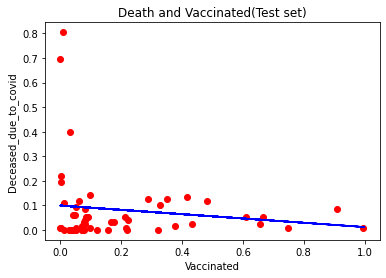

In [151]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Death and Vaccinated(Test set)')
plt.xlabel('Vaccinated')
plt.ylabel('Deceased_due_to_covid')
plt.show()

In [152]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2:", r2_score(Y_test, Y_pred))

MAE: 0.08561344096438932
MSE: 0.021726167043947194
RMSE: 0.14739798860210812
R2: 0.02667285606384473


In [153]:
data = [['RMSE', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))], ['R2', r2_score(Y_test, Y_pred)]]
metric_data = pd.DataFrame(data, columns=['Metrics', 'Linear_regression'])
  
# print dataframe.
metric_data

,Metrics,Linear_regression
0,RMSE,0.147398
1,R2,0.026673


# Polynomial Regression

In [154]:
X = df_lin.iloc[:,: 1].values
Y =df_lin.iloc[:, -1].values

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

poly=PolynomialFeatures(degree=2)
X_train_poly,X_test_poly=poly.fit_transform(X_train),poly.fit_transform(X_test)

model=linear_model.LinearRegression()
model=model.fit(X_train_poly,Y_train)
coefficient=model.coef_
intercept=model.intercept_




<function matplotlib.pyplot.show(close=None, block=None)>

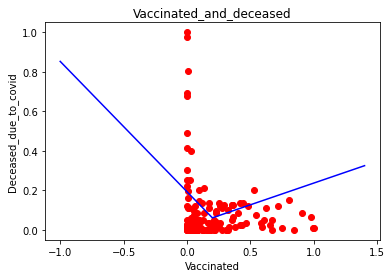

In [156]:
import matplotlib.pyplot as plt

x_axis=np.arange(-1,2,1.2)
response=intercept+coefficient[1] * x_axis+ coefficient[2] *x_axis**2

plt.scatter(X,Y,color = 'red')
plt.title('Vaccinated_and_deceased')
plt.xlabel('Vaccinated')
plt.ylabel('Deceased_due_to_covid')
plt.plot(x_axis,response,color='blue')
plt.show

In [157]:
# predicting on training data-set
Y_train_predicted = model.predict(X_train_poly)
  
  # predicting on test data-set
Y_test_predict = model.predict(poly.fit_transform(X_test))

In [158]:
print('MAE:', metrics.mean_absolute_error(Y_train, Y_train_predicted))
print('MSE:', metrics.mean_squared_error(Y_train, Y_train_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_train_predicted)))
print("R2:", r2_score(Y_test, Y_test_predict))

MAE: 0.09495461475941454
MSE: 0.025362329346571084
RMSE: 0.15925554730235014
R2: 0.04994218693421992


In [159]:
pol_val=[np.sqrt(np.sqrt(metrics.mean_squared_error(Y_train, Y_train_predicted))),r2_score(Y_test, Y_test_predict)]
# print dataframe.
metric_data['Polynomial_Regression']=pol_val
metric_data

,Metrics,Linear_regression,Polynomial_Regression
0,RMSE,0.147398,0.399068
1,R2,0.026673,0.049942


# Support Vector Regression (SVR)

In [160]:

X = df_lin.iloc[:,: 1].values
Y =df_lin.iloc[:, -1].values

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [162]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
#rbf = Gaussian Radial Basis Function Kernel
#regressor.fit(X, Y)
regressor.fit(X_train, Y_train)

SVR()

In [163]:
y_pred = regressor.predict(X_test)

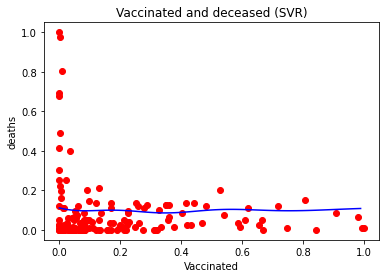

In [164]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Vaccinated and deceased (SVR)')
plt.xlabel('Vaccinated')
plt.ylabel('deaths')
plt.show()

In [165]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print("R2:", r2_score(Y_test, y_pred))

MAE: 0.09294426743883052
MSE: 0.022129017069462575
RMSE: 0.14875825042485064
R2: 0.008625270220637637


In [166]:
SVR=[np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),r2_score(Y_test, y_pred)]
# print dataframe.
metric_data['support_vector_regression']=SVR
metric_data

,Metrics,Linear_regression,Polynomial_Regression,support_vector_regression
0,RMSE,0.147398,0.399068,0.148758
1,R2,0.026673,0.049942,0.008625
